In [5]:
import os
import numpy as np
from tools import analysistools as atools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import matplotlib as mpl


In [6]:
budcolor=(31.0/255.0,119.0/255.0,180.0/255.0)
nonbudcolor=(255.0/255.0,127.0/255.0,14.0/255.0)
histcolor=(174.0/255.0,199.0/255.0,232.0/255.0)
extracolor=(44.0/255.0,160.0/255.0,44.0/255.0)
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
(188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tab20 = [tuple([float(c)/255.0 for c in t]) for t in tableau20]

In [7]:
basedir = "/Volumes/LaCie/clus/rebuilds"
tPaths = filter(lambda x: 'out.csv' in x and not '._' in x,os.listdir(basedir))
cdf = pd.DataFrame.from_csv('/Volumes/LaCie/clus/coverage.csv',index_col=None)
bdf = pd.DataFrame.from_csv('/Volumes/LaCie/clus/budtime.csv')
msdf = pd.DataFrame.from_csv('/Volumes/LaCie/clus/msd.csv',index_col=None)
rmsdf = pd.DataFrame.from_csv('/Volumes/LaCie/clus/rmsd.csv',index_col=None)
budNames = bdf[bdf.budtime>0]['name'].values
nonbudNames = bdf[bdf.budtime<0]['name'].values

OSError: [Errno 2] No such file or directory: '/Volumes/LaCie/clus/rebuilds'

In [5]:
# msdf = pd.DataFrame(columns = ['timestep'])
# for f in tPaths:
#     df = pd.DataFrame.from_csv(os.path.join(basedir,f),index_col=None)
#     oPos = df[(df.type == 2) & (df.timestep == 0)][['x','y','z']].values[-1]
#     if len(msdf['timestep'].values) < 1:
#         msdf['timestep'] = df['timestep'].unique()
#     msdf[f.split('.')[0]] = df[df.type == 2].apply(lambda r: float((r['x']-oPos[0])**2.0 + (r['y']-oPos[1])**2.0 + (r['z']-oPos[2])**2.0), axis=1).values
# msdf.to_csv('/Volumes/LaCie/clus/msd.csv',index=False)

In [6]:
sample = random.sample(budNames,50)
sample += random.sample(nonbudNames,50)

In [7]:
colors = sns.color_palette("Paired", 60)

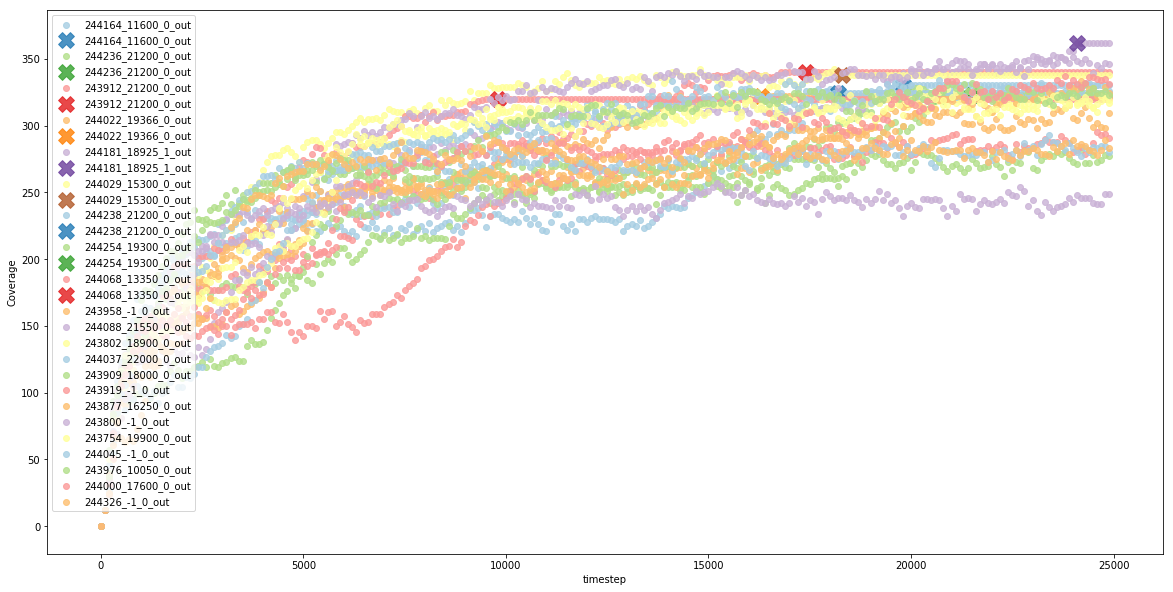

In [8]:
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(20,10))
cols = msdf.columns.difference(['timestep'])
s = cols
i=0
for c in sample:
    if c in cdf:
        bTime = bdf[bdf.name==c]['budtime'].values[0]
        sns.regplot(y=c, x="timestep", data=cdf,fit_reg=False,label=c,color=colors[i])
        if bTime >0 :
            sns.regplot(x=np.array([bTime]), y=cdf[cdf.timestep==bTime][c], scatter=True, fit_reg=False, marker='X', scatter_kws={"s": 250},label=c,color=colors[i+1])
        i+=2

plt.ylabel('Coverage')
plt.legend()
plt.show()

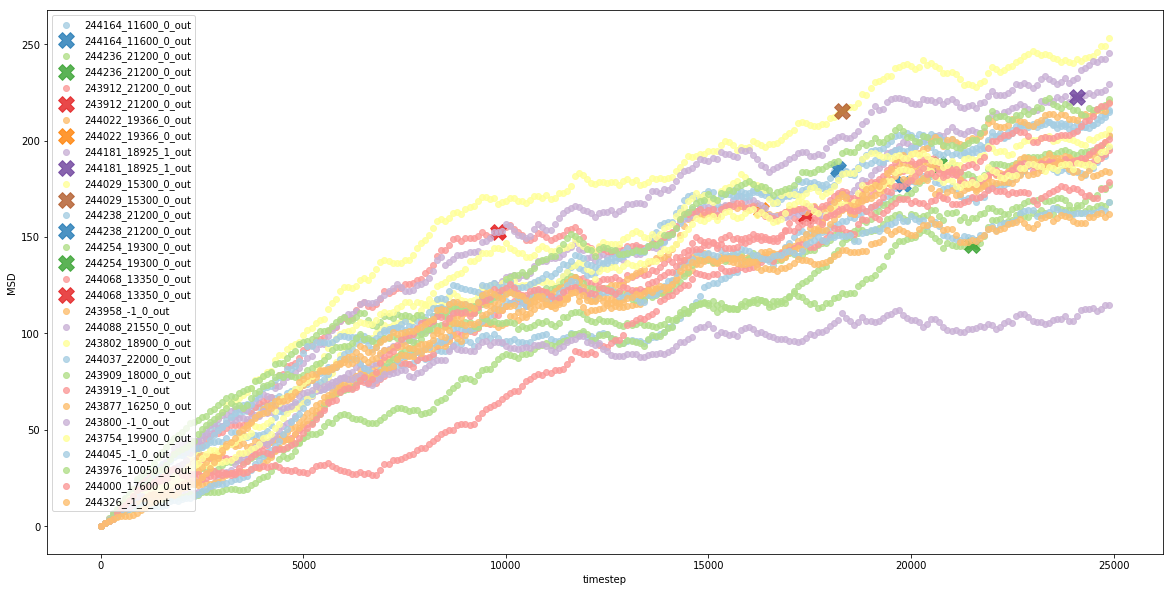

In [9]:
fig = plt.figure(figsize=(20,10))
cols = msdf.columns.difference(['timestep'])
s = cols
i=0
# color='orange' if bdf[bdf.name==c]['budtime'].values[0] == -1 else 'blue'
for c in sample:
    if c in cdf:
        bTime = bdf[bdf.name==c]['budtime'].values[0]
        sns.regplot(y=c, x="timestep", data=msdf,fit_reg=False,label=c,color=colors[i])
        if bTime >0 :
            sns.regplot(x=np.array([bTime]), y=msdf[msdf.timestep==bTime][c], scatter=True, fit_reg=False, marker='X', scatter_kws={"s": 250},label=c,color=colors[i+1])
        i+=2
plt.ylabel('MSD')
plt.legend()
plt.show()

In [10]:
budNames = bdf[bdf.budtime>0]['name'].values

nonbudNames = bdf[bdf.budtime<0]['name'].values

In [11]:
avgmsdf = pd.DataFrame()
avgmsdf['timestep'] = msdf['timestep']
avgmsdf['budding'] = msdf.drop(['timestep'], axis=1)[budNames].mean(axis=1)
avgmsdf['non_budding'] = msdf.drop(['timestep'], axis=1)[nonbudNames].mean(axis=1)

avgmsdf.to_csv('/Volumes/LaCie/clus/avgmsd.csv',index=None)

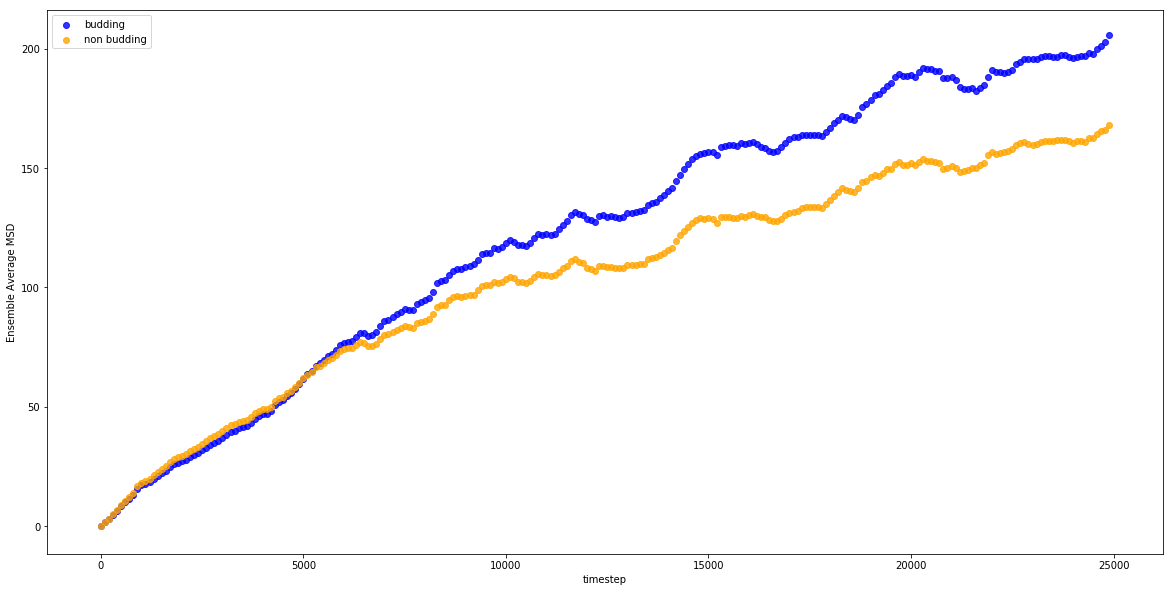

In [12]:
fig = plt.figure(figsize=(20,10))


sns.regplot(y='budding', x="timestep", data=avgmsdf,fit_reg=False,color='blue',label='budding')
sns.regplot(y='non_budding', x="timestep", data=avgmsdf,fit_reg=False,color='orange',label='non budding')


plt.ylabel('Ensemble Average MSD')
plt.legend()
plt.show()


In [13]:
# rmsdf = pd.DataFrame(columns = ['timestep'])
# for f in tPaths:
#     df = pd.DataFrame.from_csv(os.path.join(basedir,f),index_col=None)
#     corePos = df[(df.type == 2) & (df.timestep == 0)][['x','y','z']].values[-1]
#     lPos = df[(df.type == 3) & (df.timestep == 0)][['x','y','z']].values[-1]
#     oPos = lPos - corePos
#     if len(rmsdf['timestep'].values) < 1:
#         rmsdf['timestep'] = df['timestep'].unique()
#     coreSeries = df[df.type == 2][['x','y','z']].values
#     lSeries = df[df.type == 3][['x','y','z']].values
#     rSeries = lSeries-coreSeries
#     rSeries = [i-oPos for i in rSeries]
#     rmsdSeries = [i[0]**2.0 + i[1]**2.0 + i[2]**2.0 for i in rSeries]
#     rmsdf[f.split('.')[0]] = rmsdSeries
# rmsdf.to_csv('/Volumes/LaCie/clus/rmsd.csv',index=False)

In [14]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [16]:
# rmsdf2 = pd.DataFrame(columns = ['timestep'])
# for f in tPaths:
#     df = pd.DataFrame.from_csv(os.path.join(basedir,f),index_col=None)
#     corePos = df[(df.type == 2) & (df.timestep == 0)][['x','y','z']].values[-1]
#     lPos = df[(df.type == 3) & (df.timestep == 0)][['x','y','z']].values[-1]
#     oPos = lPos - corePos
#     if len(rmsdf2['timestep'].values) < 1:
#         rmsdf2['timestep'] = df['timestep'].unique()
#     coreSeries = df[df.type == 2][['x','y','z']].values
#     lSeries = df[df.type == 3][['x','y','z']].values
#     rSeries = lSeries-coreSeries
#     rSeries = [angle_between(i,oPos) for i in rSeries]
#     rmsdSeries = [i**2.0 for i in rSeries]
#     rmsdf2[f.split('.')[0]] = rmsdSeries
# rmsdf2.to_csv('/Volumes/LaCie/clus/rmsd2.csv',index=False)

In [16]:
rmsdf2=pd.DataFrame.from_csv('/Volumes/LaCie/clus/rmsd2.csv',index_col=None)

/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


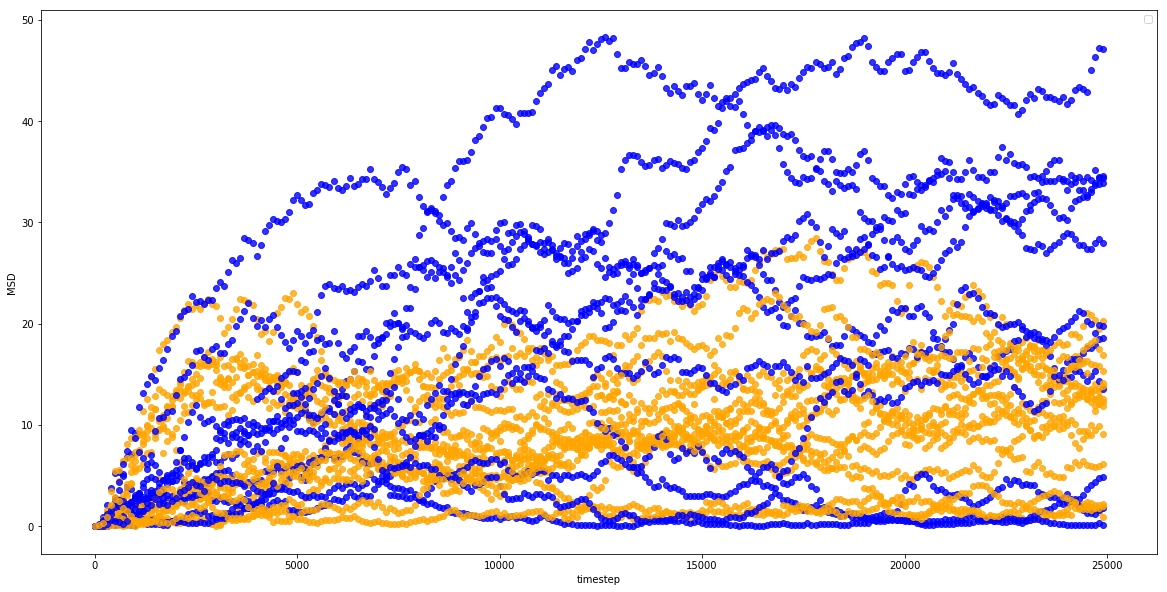

In [17]:
fig = plt.figure(figsize=(20,10))
cols = rmsdf.columns.difference(['timestep'])
s = cols
for c in random.sample(s,25):
    sns.regplot(y=c, x="timestep", data=rmsdf,fit_reg=False,color='orange' if bdf[bdf.name==c]['budtime'].values[0] == -1 else 'blue')

plt.ylabel('MSD')
plt.legend()
plt.show()

In [18]:
avgrmsdf = pd.DataFrame()
avgrmsdf['timestep'] = rmsdf['timestep']
avgrmsdf['budding'] = rmsdf.drop(['timestep'], axis=1)[budNames].mean(axis=1)
avgrmsdf['non_budding'] = rmsdf.drop(['timestep'], axis=1)[nonbudNames].mean(axis=1)
# avgrmsdf.to_csv('/Volumes/LaCie/clus/avgrmsd.csv',index=None)

In [19]:
avgrmsdf2 = pd.DataFrame()
avgrmsdf2['timestep'] = rmsdf2['timestep']
avgrmsdf2['budding'] = rmsdf2.drop(['timestep'], axis=1)[budNames].mean(axis=1)
avgrmsdf2['non_budding'] = rmsdf2.drop(['timestep'], axis=1)[nonbudNames].mean(axis=1)
avgrmsdf2['budding_std'] = rmsdf2.drop(['timestep'], axis=1)[budNames].std(axis=1)
avgrmsdf2['non_budding_std'] = rmsdf2.drop(['timestep'], axis=1)[nonbudNames].std(axis=1)
# avgrmsdf2.to_csv('/Volumes/LaCie/clus/avgrmsd2.csv',index=None)
errfac = 1.0/np.sqrt(float(len(avgrmsdf2['budding_std'])))

In [20]:
bTime

-1

In [21]:
def f(x,c):
    if x < bdf[(bdf.name==c)]['budtime'].values[0]:
        return x 
    else:
        return pd.nan

In [22]:
v=[0.0]*249
n=[0.0]*249
for c in rmsdf[budNames]:
    tv=rmsdf[np.append(['timestep'],budNames)][np.append(['timestep'],[c])]
    if bdf[bdf.name==c]['budtime'].values[0] > 0:
        tv=tv[tv.timestep<bdf[bdf.name==c]['budtime'].values[0]]
    tvv=tv[c].values
    for i,u in enumerate(tvv):
        v[i]+=tvv[i]
        n[i]+=1

for i,u in enumerate(v):
    v[i]=v[i]/n[i]
v=np.append(v,0)
avgrmsdf['prebudding']=v

In [23]:
v=[0.0]*249
n=[0.0]*249
s=[0.0]*249
for c in rmsdf2[budNames]:
    tv=rmsdf2[np.append(['timestep'],budNames)][np.append(['timestep'],[c])]
    if bdf[bdf.name==c]['budtime'].values[0] > 0:
        tv=tv[tv.timestep<bdf[bdf.name==c]['budtime'].values[0]]
    tvv=tv[c].values
    for i,u in enumerate(tvv):
        v[i]+=tvv[i]
        n[i]+=1
        s[i]=np.std(tvv)

for i,u in enumerate(v):
    v[i]=v[i]/n[i]
v=np.append(v,-1)
s=np.append(s,-1)
avgrmsdf2['prebudding']=v
avgrmsdf2['prebudding_std']=s

In [24]:
print len(avgrmsdf)
print len(v)

250
250


In [25]:
plt.rc('text', usetex=True)
sns.set(rc={'text.usetex':True, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'})
sns.set_style('white')

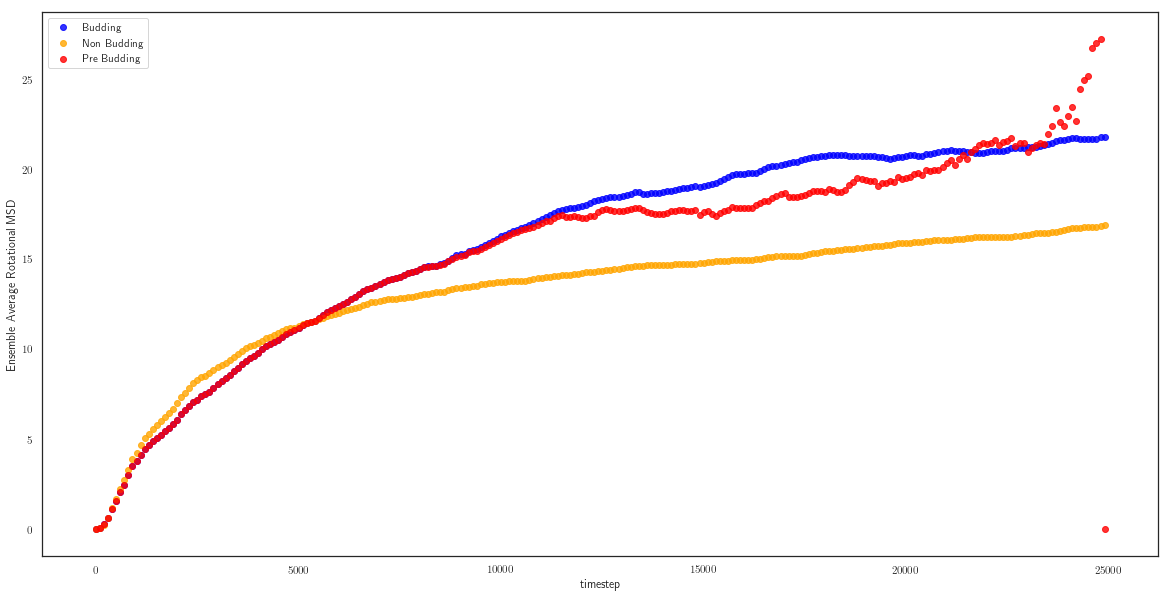

In [27]:
fig = plt.figure(figsize=(20,10))


# sns.jointplot(x=avgrmsdf["timestep"], y=avgrmsdf["budding"], kind='reg',fit_reg=False)
# # sns.jointplot(x=avgrmsdf["timestep"], y=avgrmsdf["non_budding"], kind='scatter')

sns.regplot(y='budding', x="timestep",  data=avgrmsdf,fit_reg=False,color='blue',label='Budding')
sns.regplot(y='non_budding', x="timestep",  data=avgrmsdf,fit_reg=False,color='orange',label='Non Budding')
sns.regplot(y='prebudding', x="timestep",  data=avgrmsdf,fit_reg=False,color='red',label='Pre Budding')

plt.ylabel('Ensemble Average Rotational MSD')
plt.legend()
plt.show()

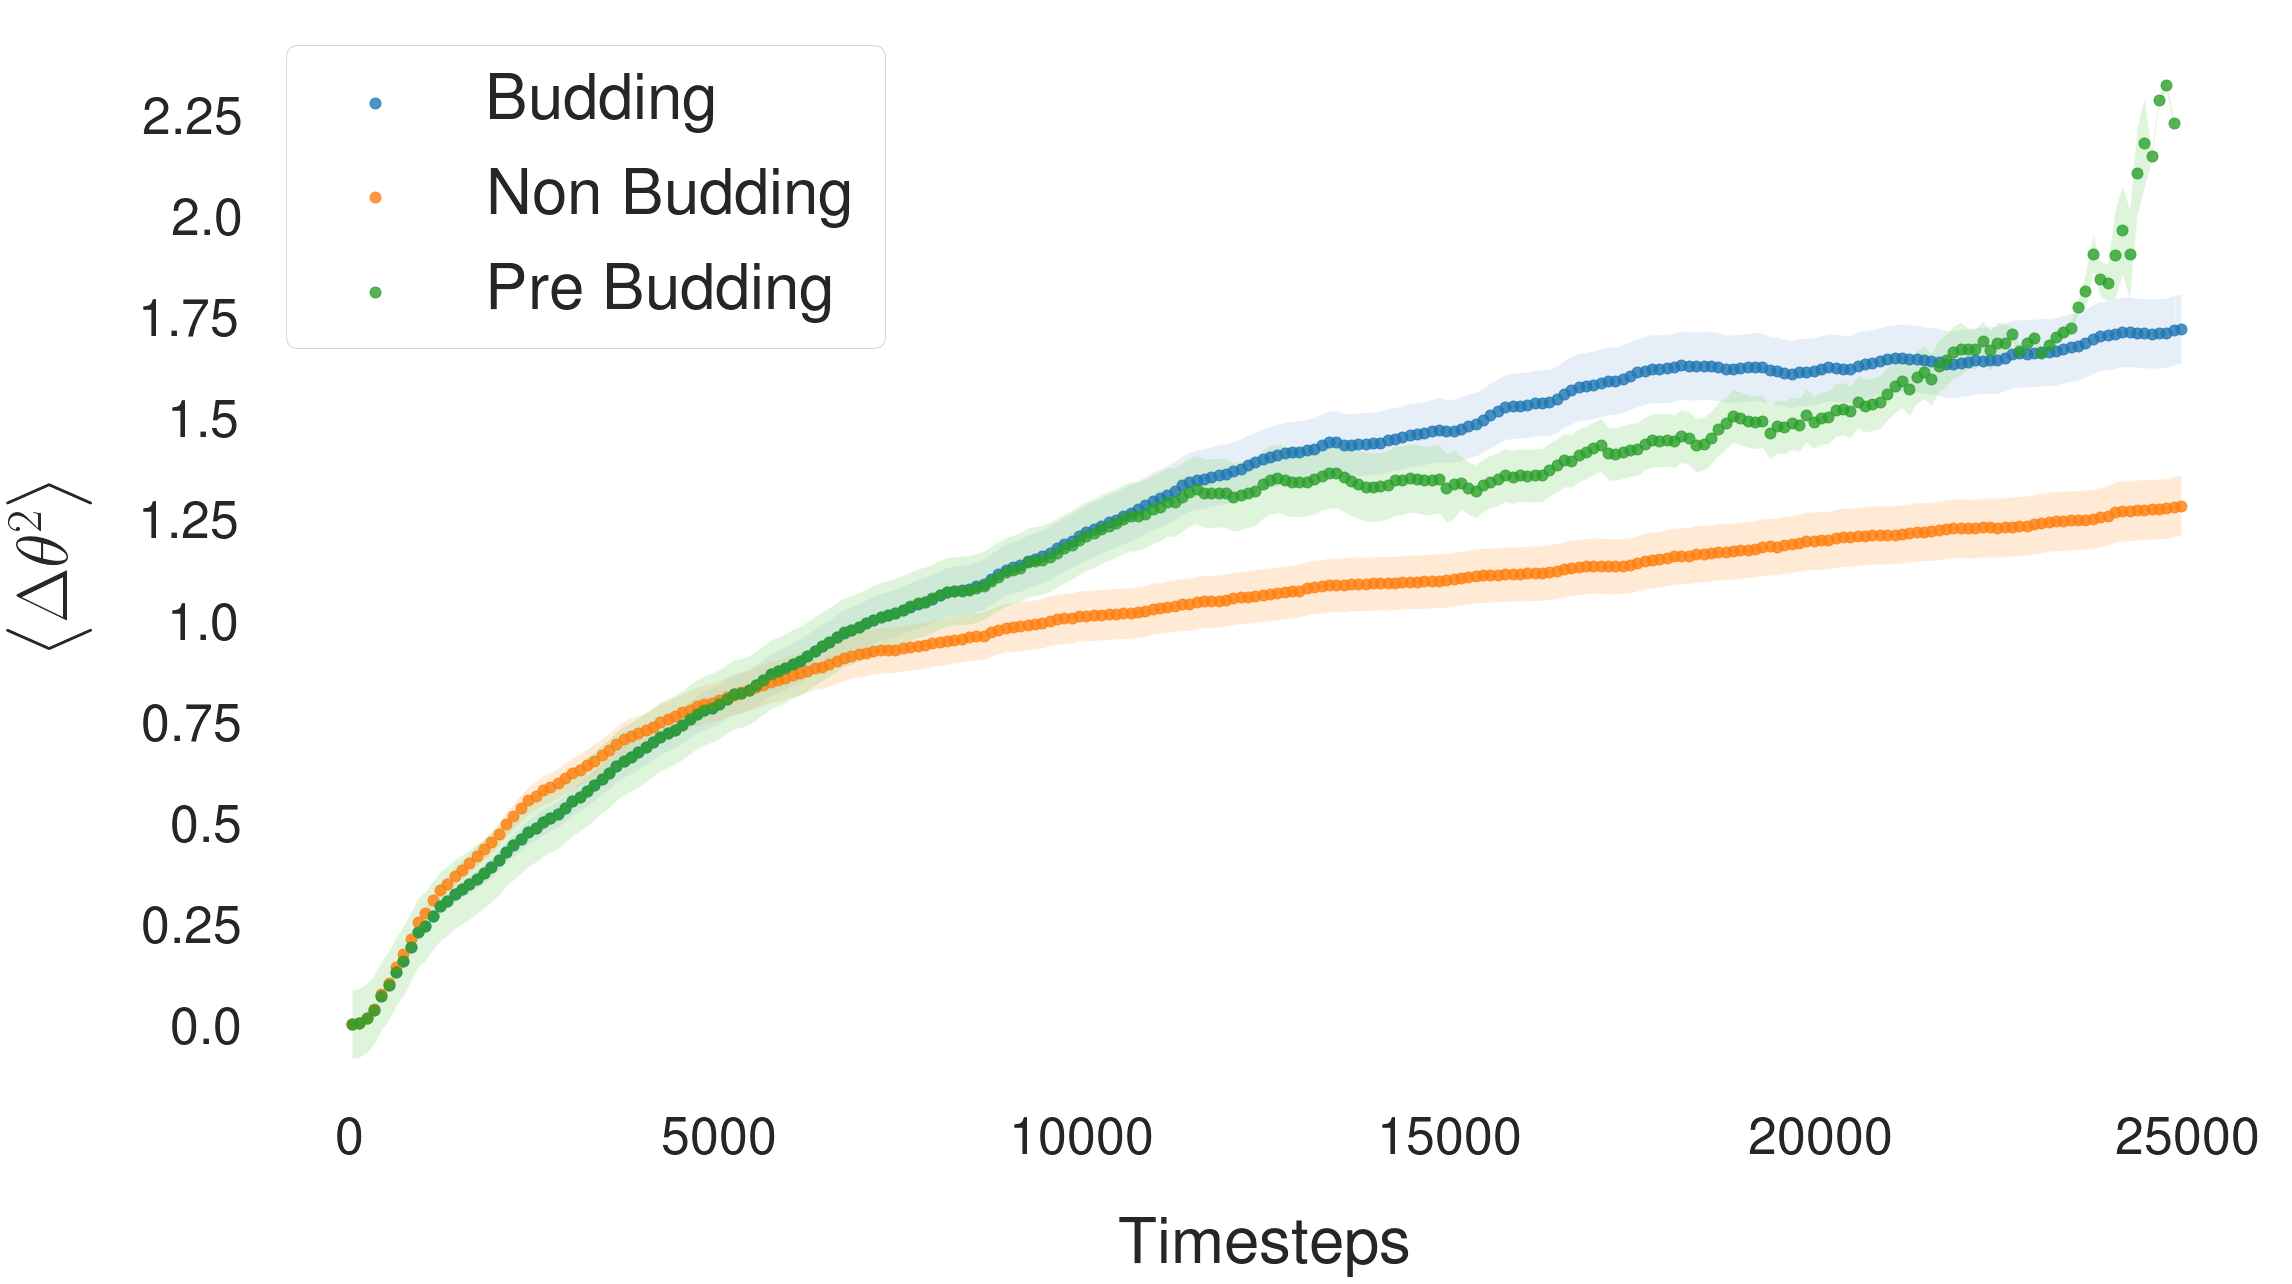

In [51]:
fig = plt.figure(figsize=(16*2,9*2))

sns.set(rc={'text.usetex':True, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'}, font='Helvetica',style='white')
# sns.jointplot(x=avgrmsdf["timestep"], y=avgrmsdf["budding"], kind='reg',fit_reg=False)
# # sns.jointplot(x=avgrmsdf["timestep"], y=avgrmsdf["non_budding"], kind='scatter')

ax = plt.gca()
sns.regplot(y='budding', x="timestep",  data=avgrmsdf2,fit_reg=False,color=tab20[0],label='Budding',marker='o',scatter_kws={"s": 120})
sns.regplot(y='non_budding', x="timestep",  data=avgrmsdf2,fit_reg=False,color=tab20[2],label='Non Budding',marker='o',scatter_kws={"s": 120})
sns.regplot(y='prebudding', x="timestep",  data=avgrmsdf2,fit_reg=False,color=tab20[4],label='Pre Budding',scatter_kws={"s": 120})

plt.legend(fontsize=32*2)

# ax.errorbar(avgrmsdf2['timestep'], avgrmsdf2['budding'], yerr= avgrmsdf2['budding_std']*errfac, ecolor=budcolor, zorder=-1)
# ax.errorbar(avgrmsdf2['timestep'], avgrmsdf2['non_budding'], yerr= avgrmsdf2['non_budding_std']*errfac, ecolor=nonbudcolor, zorder=-1)
yerrbud1= avgrmsdf2['budding'] - avgrmsdf2['budding_std']*errfac
yerrbud2= avgrmsdf2['budding'] + avgrmsdf2['budding_std']*errfac

yerrnonbud1= avgrmsdf2['non_budding'] - avgrmsdf2['non_budding_std']*errfac
yerrnonbud2= avgrmsdf2['non_budding'] + avgrmsdf2['non_budding_std']*errfac

yerrprebud1= avgrmsdf2['prebudding'] - avgrmsdf2['prebudding_std']*errfac
yerrprebud2= avgrmsdf2['prebudding'] + avgrmsdf2['prebudding_std']*errfac

ax.fill_between(avgrmsdf2['timestep'],yerrbud1, yerrbud2, where=yerrbud2 >= yerrbud1, facecolor=tab20[1], interpolate=True,alpha=0.3,zorder=-1)
ax.fill_between(avgrmsdf2['timestep'],yerrnonbud1, yerrnonbud2, where=yerrnonbud2 >= yerrnonbud1, facecolor=tab20[3], interpolate=True,alpha=0.3,zorder=-1)
ax.fill_between(avgrmsdf2['timestep'],yerrprebud1, yerrprebud2, where=yerrprebud2 >= yerrprebud1, facecolor=tab20[5], interpolate=True,alpha=0.3,zorder=-1)

plt.xlabel(r'Timesteps',fontsize=32*2, labelpad=50)
plt.ylabel(r'\textbf{$\left \langle \Delta\theta^2 \right \rangle $}',fontsize=36*2, labelpad=50)
plt.xticks(fontsize=26*2)
plt.yticks(fontsize=26*2)
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  

ax.set_xticks([0,5000,10000,15000,20000,25000])
ax.set_xticklabels([0,5000,10000,15000,20000,25000])
ax.set_yticks([0.0,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.0,2.25])
ax.set_yticklabels([0.0,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.0,2.25])
ax=plt.gca()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_ylim(-0.2)
plt.tight_layout()

plt.savefig('/Volumes/LaCie/clus/rmsd2.eps', format='eps')
plt.savefig('/Volumes/LaCie/clus/rmsd2png.png', format='png')

plt.show()

In [4]:
fig = plt.figure(figsize=(16*2,9*2))

colors=cmap=sns.color_palette()

sns.set(rc={'text.usetex':True, 'font.family':'sans-serif', 'font.sans-serif':'Helvetica'}, font='Helvetica',style='white')

    


graph = sns.JointGrid(x=avgrmsdf2.timestep, y=avgrmsdf2.budding,space=1.0)

graph.fig.set_figwidth(16*2)
graph.fig.set_figheight(9*2)


sns.despine()


plt.grid(False)




graph.plot_joint(plt.scatter, marker='o', s=120,label='Budding',color=budcolor)
graph.x = avgrmsdf2.timestep
graph.y = avgrmsdf2.non_budding
graph.plot_joint(plt.scatter, marker='o', s=120,label='Non Budding',color=nonbudcolor)
# graph.x = avgrmsdf2.timestep
# graph.y = avgrmsdf2.prebudding
# graph.plot_joint(plt.scatter, marker='o', s=120,label='Pre Budding',color=tab20[4])

graph.ax_marg_x.hist(
    bdf[bdf.budtime > 0]['budtime'],
    color=histcolor,
    alpha = 0.5,
    )


graph.ax_marg_y.set_visible(False)

graph.ax_marg_x.set_ylabel(r"\textbf{Count}",fontsize=22*2)
graph.ax_marg_x.set_title(r"\textbf{Budding Events}",fontsize=22*2)
graph.ax_marg_x.set_yticks([])
graph.ax_marg_x.set_ylim(0,200)


for tick in graph.ax_marg_x.get_yticklabels():
    tick.set_visible(True)
    tick.set_fontsize(12)


plt.xlabel(r'Timesteps',fontsize=32*2, labelpad=50)
plt.ylabel(r'\textbf{$\left \langle \Delta\theta^2 \right \rangle $}',fontsize=36*2, labelpad=50)
plt.legend(fontsize=26*2)
plt.xticks(fontsize=26*2)
plt.yticks(fontsize=26*2)
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  

ax=plt.gca()

yerrbud1= avgrmsdf2['budding'] - avgrmsdf2['budding_std']*errfac
yerrbud2= avgrmsdf2['budding'] + avgrmsdf2['budding_std']*errfac

yerrnonbud1= avgrmsdf2['non_budding'] - avgrmsdf2['non_budding_std']*errfac
yerrnonbud2= avgrmsdf2['non_budding'] + avgrmsdf2['non_budding_std']*errfac

yerrprebud1= avgrmsdf2['prebudding'] - avgrmsdf2['prebudding_std']*errfac
yerrprebud2= avgrmsdf2['prebudding'] + avgrmsdf2['prebudding_std']*errfac

ax.fill_between(avgrmsdf2['timestep'],yerrbud1, yerrbud2, where=yerrbud2 >= yerrbud1, facecolor=tab20[1], interpolate=True,alpha=0.3,zorder=-1)
ax.fill_between(avgrmsdf2['timestep'],yerrnonbud1, yerrnonbud2, where=yerrnonbud2 >= yerrnonbud1, facecolor=tab20[3], interpolate=True,alpha=0.3,zorder=-1)
# ax.fill_between(avgrmsdf2['timestep'],yerrprebud1, yerrprebud2, where=yerrprebud2 >= yerrprebud1, facecolor=tab20[5], interpolate=True,alpha=0.3,zorder=-1)


ax.set_xticks([0,5000,10000,15000,20000,25000])
ax.set_xticklabels([0,5000,10000,15000,20000,25000])
ax.set_yticks([0.0,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.0])
ax.set_yticklabels([0.0,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.0])

ax.set_ylim(-0.2)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
plt.tight_layout()
plt.savefig('/Volumes/LaCie/clus/rmsd-pre.eps', format='eps')
plt.savefig('/Volumes/LaCie/clus/rotdiff2-pre.png', format='png')
plt.show()


NameError: name 'avgrmsdf2' is not defined

<Figure size 2304x1296 with 0 Axes>

In [23]:
cBud = []
cNBud = []
for c in cdf.columns:
    if c in budNames:
        cBud.append(c)
    elif c in nonbudNames:
        cNBud.append(c)
        

In [24]:
meancdf = pd.DataFrame()
meancdf['timestep'] = cdf['timestep']
meancdf['budding'] = cdf.drop('timestep',axis=1)[cBud].mean(axis=1)
meancdf['non_budding'] = cdf.drop('timestep',axis=1)[cNBud].mean(axis=1)


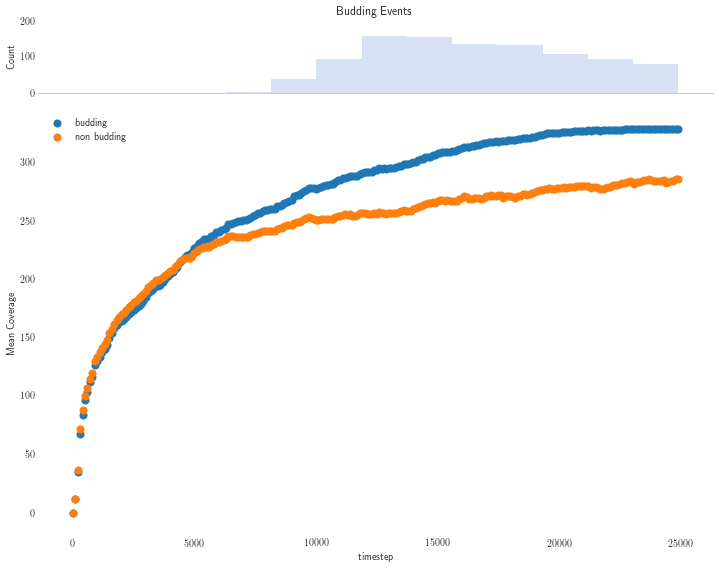

In [25]:
fig = plt.figure(figsize=(20,20))

graph = sns.JointGrid(x=meancdf.timestep, y=meancdf.budding,space=1.0)

graph.fig.set_figwidth(12)
graph.fig.set_figheight(8)

graph.plot_joint(plt.scatter, marker='o', s=50,label='budding',color=budcolor)
graph.x = meancdf.timestep
graph.y = meancdf.non_budding
graph.plot_joint(plt.scatter, marker='o', s=50,label='non budding',color=nonbudcolor)

graph.ax_marg_x.hist(
    bdf[bdf.budtime > 0]['budtime'],
    color=histcolor,
    alpha = 0.5,
    )


graph.ax_marg_y.set_visible(False)

graph.ax_marg_x.set_ylabel("Count")
graph.ax_marg_x.set_title("Budding Events")
graph.ax_marg_x.set_ylim(0,200)


for tick in graph.ax_marg_x.get_yticklabels():
    tick.set_visible(True)

plt.ylabel("Mean Coverage")
plt.legend()
ax=plt.gca()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
plt.tight_layout()


plt.savefig('/Volumes/LaCie/clus/coverage.eps', format='eps')
plt.show()

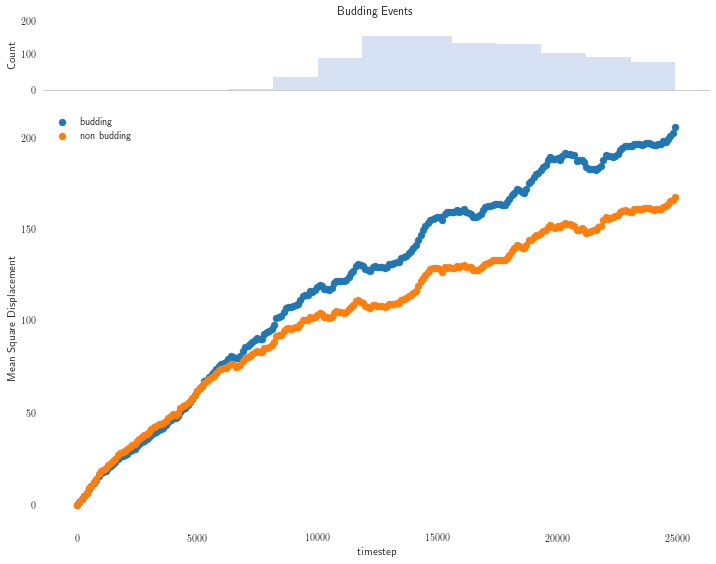

In [50]:
fig = plt.figure(figsize=(20,20))

graph = sns.JointGrid(x=avgmsdf.timestep, y=avgmsdf.budding,space=1.0)

graph.fig.set_figwidth(12)
graph.fig.set_figheight(8)

graph.plot_joint(plt.scatter, marker='o', s=50,label='budding',color=budcolor)
graph.x = avgmsdf.timestep
graph.y = avgmsdf.non_budding
graph.plot_joint(plt.scatter, marker='o', s=50,label='non budding',color=nonbudcolor)

graph.ax_marg_x.hist(
    bdf[bdf.budtime > 0]['budtime'],
    color=histcolor,
    alpha = 0.5,
    )

graph.ax_marg_y.set_visible(False)
graph.ax_marg_x.set_ylabel("Count")
graph.ax_marg_x.set_title("Budding Events")
graph.ax_marg_x.set_ylim(0,200)

for tick in graph.ax_marg_x.get_yticklabels():
    tick.set_visible(True)

plt.ylabel("Mean Square Displacement")
plt.legend()
ax=plt.gca()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
plt.tight_layout()
plt.savefig('/Volumes/LaCie/clus/msd.eps', format='eps')
plt.show()

 
0.2622 x - 1.05  
0.4634 x - 1.778


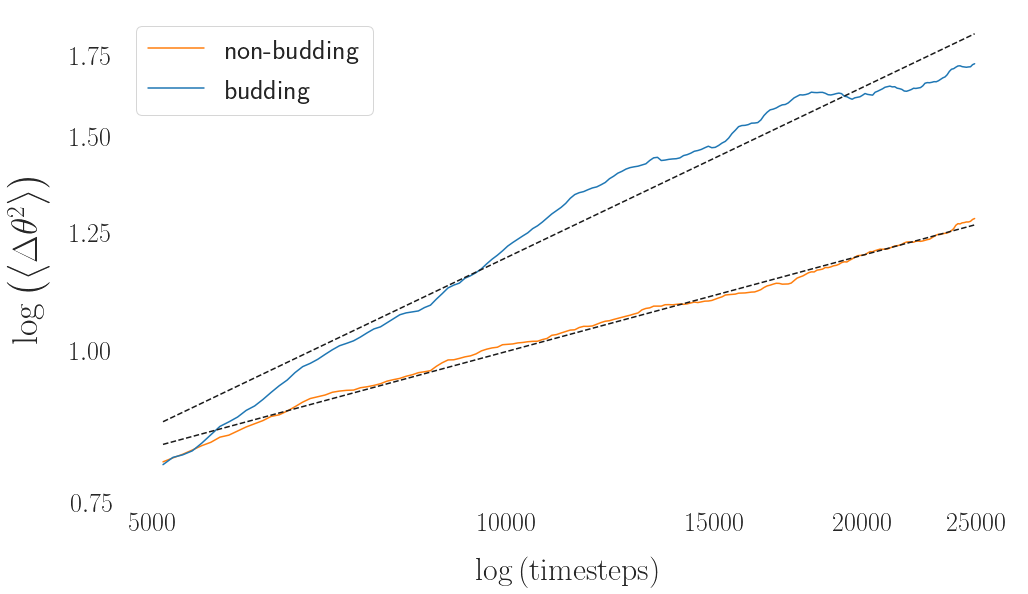

In [175]:
ts=5000
fig = plt.figure(figsize=(16,9))


x=np.array(avgrmsdf2[avgrmsdf2.timestep>ts]['timestep'].values.tolist())
y=np.array(avgrmsdf2[avgrmsdf2.timestep>ts]['non_budding'].values.tolist())
yb=np.array(avgrmsdf2[avgrmsdf2.timestep>ts]['budding'].values.tolist())
logx=np.log10(x)
logy=np.log10(y)
logyb=np.log10(yb)

fit = np.polyfit(logx,logy,1)
fit_fn = np.poly1d(fit)
yfit = lambda x: 10.0**(fit_fn(np.log10(x)))

fitb = np.polyfit(logx,logyb,1)
fit_fnb = np.poly1d(fitb)
yfitb = lambda x: 10.0**(fit_fnb(np.log10(x)))



plt.loglog(x,y,label='non-budding',color=nonbudcolor)
plt.loglog(x,yb,label='budding',color=budcolor)
plt.loglog(x, yfit(x), '--k')
plt.loglog(x, yfitb(x), '--k')
plt.xlabel(r'$\log\left( \textrm{timesteps} \right)$',fontsize=32, labelpad=20)
plt.ylabel(r'\textbf{$\log\left( \left \langle \Delta\theta^2 \right \rangle \right) $}',fontsize=36, labelpad=20)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  


plt.legend(fontsize=28)

ax=plt.gca()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

plt.tick_params(axis='both', which='minor', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

ax.set_xscale('log')
ax.set_xticks([5000,10000,15000,20000,25000])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())


ax.set_yscale('log')
ax.set_yticks([0.75,1.00,1.25,1.5,1.75])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())


print fit_fn, fit_fnb
plt.show()

In [138]:
fit_fn[1]*0.25

0.06554094856142569

In [141]:
fit_fnb[1]*0.25

0.1158555534207293

 
1.365 x - 4.795  
1.307 x - 4.668


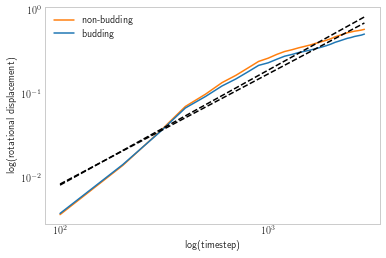

In [120]:
x=np.array(avgrmsdf2[(avgrmsdf2.timestep<ts) & (avgrmsdf2.timestep>0)]['timestep'].values.tolist())
y=np.array(avgrmsdf2[(avgrmsdf2.timestep<ts) & (avgrmsdf2.timestep>0)]['non_budding'].values.tolist())
yb=np.array(avgrmsdf2[(avgrmsdf2.timestep<ts) & (avgrmsdf2.timestep>0)]['budding'].values.tolist())
logx=np.log10(x)
logy=np.log10(y)
logyb=np.log10(yb)

fit = np.polyfit(logx,logy,1)
fit_fn = np.poly1d(fit)
yfit = lambda x: 10.0**(fit_fn(np.log10(x)))

fitb = np.polyfit(logx,logyb,1)
fit_fnb = np.poly1d(fitb)
yfitb = lambda x: 10.0**(fit_fnb(np.log10(x)))

plt.loglog(x,y,label='non-budding',color=nonbudcolor)
plt.loglog(x,yb,label='budding',color=budcolor)
plt.loglog(x, yfit(x), '--k')
plt.loglog(x, yfitb(x), '--k')
plt.xlabel('log(timestep)')
plt.ylabel('log(rotational displacement)')
plt.legend()
ax=plt.gca()
print fit_fn, fit_fnb
plt.show()